<a id='top'></a>

# 第3章 顧客の全体像を把握する10本ノック

In [31]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

## 目次
---
[ノック21: データを読み込んで把握しよう](#21)  
[ノック22: 顧客データを成形しよう](#22)  
[ノック23: 顧客データの基礎集計をしよう](#23)  
[ノック24: 最新顧客データの基礎集計をしてみよう](#24)  
[ノック25: 利用履歴データを集計しよう](#25)  
[ノック26: 利用履歴データから定期利用フラグを作成しよう](#26)  
[ノック27: 顧客データと利用履歴データを統合しよう](#27)  
[ノック28: 会員期間を計算しよう](#28)  
[ノック29: 顧客行動の各種統計量を把握しよう](#29)  
[ノック30: 退会ユーザーと継続ユーザーの違いを把握しよう](#30)

<a id='21'></a>

## ノック21: データを読み込んで把握しよう

In [2]:
directory = "../data/サンプルコード_20201021/3章/"
use_log = pd.read_csv(directory + "use_log.csv", parse_dates=[2])
customer_master = pd.read_csv(directory + "customer_master.csv", parse_dates=[4, 5])
class_master = pd.read_csv(directory + "class_master.csv")
campaign_master = pd.read_csv(directory + "campaign_master.csv")
display(use_log)
display(customer_master)
display(class_master)
display(campaign_master)

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


<a id='22'></a>

## ノック22: 顧客データを成形しよう

In [3]:
customer_join = pd.merge(customer_master, class_master, how="left", on="class")
customer_join = pd.merge(customer_join, campaign_master, how="left", on="campaign_id")
assert len(customer_master) == len(customer_join)
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


In [4]:
# 欠損値確認
customer_join.isna().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

<a id="23"></a>

## ノック23: 顧客データの基礎集計をしよう

In [5]:
# 会員区分の集計
customer_join["class_name"].value_counts()

オールタイム    2045
ナイト       1128
デイタイム     1019
Name: class_name, dtype: int64

In [6]:
# キャンペーン区分の集計
customer_join["campaign_name"].value_counts()

通常       3050
入会費半額     650
入会費無料     492
Name: campaign_name, dtype: int64

In [7]:
# 性別の集計
customer_join["gender"].value_counts()

M    2209
F    1983
Name: gender, dtype: int64

In [8]:
# 退会数の集計
customer_join["is_deleted"].value_counts()

0    2842
1    1350
Name: is_deleted, dtype: int64

In [9]:
# 入会数の集計
(
    (pd.to_datetime("2018-04-01") <= customer_join["start_date"]) &
    (customer_join["start_date"] <= pd.to_datetime("2019-03-31"))
).sum()

1376

In [10]:
customer_join.groupby(["gender", "class_name", "campaign_name"])["customer_id"].count().rename("count").reset_index()

,gender,class_name,campaign_name,count
0,F,オールタイム,入会費半額,127
1,F,オールタイム,入会費無料,110
2,F,オールタイム,通常,585
3,F,デイタイム,入会費半額,115
4,F,デイタイム,入会費無料,104
5,F,デイタイム,通常,616
6,F,ナイト,入会費半額,44
7,F,ナイト,入会費無料,37
8,F,ナイト,通常,245
9,M,オールタイム,入会費半額,211


<a id='24'></a>

## ノック24: 最新顧客データの基礎集計をしてみよう

In [11]:
customer_latest = customer_join.loc[
    (customer_join["end_date"] >= pd.to_datetime("2019-03-31")) |
    (customer_join["is_deleted"] == 0)
]
print(customer_latest["end_date"].unique())
customer_latest

[                          'NaT' '2019-03-31T00:00:00.000000000']


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


In [12]:
# 会員区分の集計
customer_latest["class_name"].value_counts()

オールタイム    1444
ナイト        813
デイタイム      696
Name: class_name, dtype: int64

In [13]:
# キャンペーン区分の集計
customer_latest["campaign_name"].value_counts()

通常       2400
入会費半額     311
入会費無料     242
Name: campaign_name, dtype: int64

In [14]:
# 性別の集計
customer_latest["gender"].value_counts()

M    1553
F    1400
Name: gender, dtype: int64

<a id='25'></a>

## ノック25: 利用履歴データを集計しよう

In [15]:
# 各顧客の月々の利用回数を集計
use_log["use_month"] = use_log["usedate"].dt.strftime("%Y-%m")
month_count = use_log.groupby(["use_month", "customer_id"])["log_id"].count().rename("count").reset_index()
month_count

,use_month,customer_id,count
0,2018-04,AS002855,4
1,2018-04,AS009013,2
2,2018-04,AS009373,3
3,2018-04,AS015315,6
4,2018-04,AS015739,7
...,...,...,...
36837,2019-03,TS995853,8
36838,2019-03,TS998593,8
36839,2019-03,TS999079,3
36840,2019-03,TS999231,6


In [16]:
# 各顧客の月々の利用回数の統計量
customer_log = month_count.groupby("customer_id")["count"].agg(["mean", "median", "max", "min"])
customer_log

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


<a id='26'></a>

## ノック26: 利用履歴データから定期利用フラグを作成しよう

In [17]:
use_log["weekday"] = use_log["usedate"].dt.weekday
week_count = use_log.groupby(["customer_id", "use_month", "weekday"])["log_id"].agg(["count"]).reset_index().\
                groupby("customer_id")["count"].max().reset_index()
week_count["regular_flg"] = (week_count["count"] >= 4).astype(int)
week_count

,customer_id,count,regular_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


<a id='27'></a>

## ノック27: 顧客データと利用履歴データを統合しよう

In [18]:
customer_join = pd.merge(customer_join, customer_log, how="left", on="customer_id")
customer_join = pd.merge(customer_join, week_count[["customer_id", "regular_flg"]], how="left", on="customer_id")
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,regular_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0


In [19]:
# 確認
customer_join.isna().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
regular_flg         0
dtype: int64

<a id='28'></a>

## ノック28: 会員期間を計算しよう

In [27]:
end_date = customer_join["end_date"].fillna(pd.to_datetime("2019-04-30"))
start_date = customer_join["start_date"].copy()
customer_join["membership_period"] = (end_date.dt.year - start_date.dt.year) * 12 +\
                                        (end_date.dt.month - start_date.dt.month)
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,regular_flg,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0,1


<a id='29'></a>

## ノック29: 顧客行動の各種統計量を把握しよう

In [29]:
# 月々の利用回数の統計量のdescribe
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [30]:
# 定期利用フラグの集計
customer_join["regular_flg"].value_counts()

1    3413
0     779
Name: regular_flg, dtype: int64

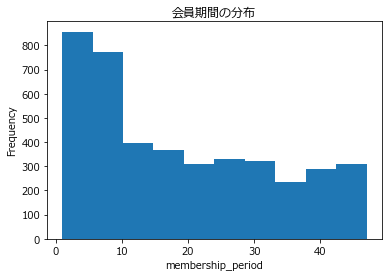

In [33]:
# 会員期間の分布
customer_join["membership_period"].plot.hist()
plt.title("会員期間の分布")
plt.xlabel("membership_period")
plt.show()

<a id='30'></a>

## ノック30: 退会ユーザーと継続ユーザーの違いを把握しよう

In [41]:
# 退会ユーザー
customer_end = customer_join[customer_join["is_deleted"].astype(bool)]
customer_end.describe()

,is_deleted,price,mean,median,max,min,regular_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [38]:
# 継続ユーザー
customer_stay = customer_join[~customer_join["is_deleted"].astype(bool)]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,regular_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [43]:
# dump
customer_join.to_csv(directory + "customer_join.csv", index=False)

[<div style="text-align: right;">トップに戻る</div>](#top)